In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8,1.2]
)

train_data = train_datagen.flow_from_directory(
    "dataset/Garbage classification",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = train_datagen.flow_from_directory(
    "dataset/Garbage classification",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [3]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(train_data.num_classes, activation="softmax")(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,592,582 (9.89 MB)

 Trainable params: 332,038 (1.27 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

In [4]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6339 - loss: 1.1568 - val_accuracy: 0.6759 - val_loss: 0.8803
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 48s 756ms/step - accuracy: 0.7999 - loss: 0.5810 - val_accuracy: 0.7455 - val_loss: 0.7674
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 48s 753ms/step - accuracy: 0.8202 - loss: 0.5063 - val_accuracy: 0.7376 - val_loss: 0.7750
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 49s 758ms/step - accuracy: 0.8483 - loss: 0.4386 - val_accuracy: 0.7197 - val_loss: 0.8360
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 50s 778ms/step - accuracy: 0.8389 - loss: 0.4452 - val_accuracy: 0.7296 - val_loss: 0.8614
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 44s 689ms/step - accuracy: 0.8750 - loss: 0.3465 - val_accuracy: 0.7475 - val_loss: 0.7219
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 46s 724ms/step - accuracy: 0.8864 - loss: 0.3130 - val_accuracy: 0.7475 - val_loss: 0.7618
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 46s 723ms/step - accuracy: 0.8928 - loss: 0.3056 - val_accurac

In [5]:
base_model.trainable = True

for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 72s 952ms/step - accuracy: 0.8053 - loss: 0.5758 - val_accuracy: 0.7137 - val_loss: 0.9579
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 59s 916ms/step - accuracy: 0.8424 - loss: 0.4441 - val_accuracy: 0.6938 - val_loss: 1.1679
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 55s 865ms/step - accuracy: 0.8562 - loss: 0.4406 - val_accuracy: 0.6998 - val_loss: 1.2834
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 56s 879ms/step - accuracy: 0.8597 - loss: 0.4002 - val_accuracy: 0.6899 - val_loss: 1.3887
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 56s 875ms/step - accuracy: 0.8552 - loss: 0.4004 - val_accuracy: 0.7157 - val_loss: 1.1172


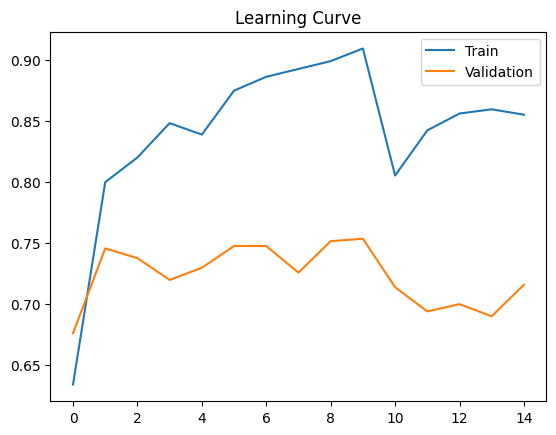

In [6]:
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'])
plt.legend(["Train","Validation"])
plt.title("Learning Curve")
plt.show()

In [7]:
model.save("garbage_model_v2.keras")